In [1]:
import pandas as pd
import numpy as np
 
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
 
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier , GradientBoostingClassifier  , AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

 
from sklearn import metrics

# loading the data

In [2]:
data = pd.read_csv( 'train_s3TEQDk.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


# checking its data types

In [4]:
data.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [5]:
data['Credit_Product']=data['Credit_Product'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       245725 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


# here labelencoder is used to transform non-numerical labels to numerical labels.

In [6]:
from sklearn.preprocessing import LabelEncoder
 
le = LabelEncoder()
 
data['Gender']= le.fit_transform(data['Gender'])
data['Occupation']= le.fit_transform(data['Occupation'])
data['Credit_Product']= le.fit_transform(data['Credit_Product'])
data['Vintage']= le.fit_transform(data['Vintage'])
data['Region_Code']= le.fit_transform(data['Region_Code'])
data['Channel_Code']= le.fit_transform(data['Channel_Code'])
data['Age']= le.fit_transform(data['Age'])
data['Is_Lead']= le.fit_transform(data['Is_Lead'])
data['Is_Active']= le.fit_transform(data['Is_Active'])
data['ID']= le.fit_transform(data['ID'])

In [7]:
target=data.iloc[:,10:]
input=data.iloc[:,0:6]
target,input

(        Is_Lead
 0             0
 1             0
 2             0
 3             0
 4             0
 ...         ...
 245720        0
 245721        0
 245722        0
 245723        0
 245724        0
 
 [245725 rows x 1 columns],
             ID  Gender  Age  Region_Code  Occupation  Channel_Code
 0       179194       0   50           18           1             2
 1       131013       0    7           27           2             0
 2       121520       0   33           18           3             2
 3        57273       1   11           20           2             0
 4       209602       0    7           32           2             0
 ...        ...     ...  ...          ...         ...           ...
 245720   60529       1   28           34           3             2
 245721  122463       1    4           18           2             0
 245722  111270       0    3           31           2             0
 245723  111156       0    5           23           2             0
 245724   60342   

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [9]:
%matplotlib inline
np.random.seed(27)
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [10]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [11]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

0    187437
1     58288
Name: Is_Lead, dtype: int64


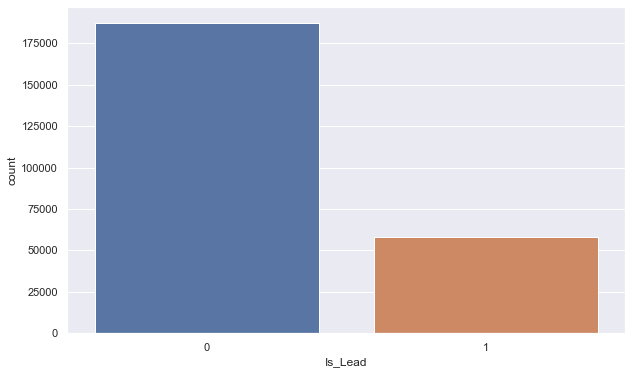

In [12]:
target = 'Is_Lead'
df1=data.copy()
X = df1.loc[:, df1.columns!=target]
Y = df1.loc[:, df1.columns==target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state=42)
ax = sns.countplot(x=df1.Is_Lead, data=df1)
print(df1[target].value_counts())

# At first used xgboost

In [13]:
import xgboost as xg
from xgboost import XGBClassifier
 
clf2 = xg.XGBClassifier(class_weight='balanced').fit(X_train, Y_train)

[22:22:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:22:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [14]:
clf2 = xg.XGBClassifier(class_weight='balanced').fit(X_train, Y_train)

[22:22:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:22:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [15]:
from sklearn.utils import class_weight
class_weight.compute_class_weight('balanced', np.unique(Y_train), Y_train[target])

array([0.65555069, 2.10719314])

In [16]:
Y_Test_Pred = clf2.predict(X_test)

In [17]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.8587988654581329
Precision =  0.7877396905308358
Recall =  0.5535036154606461
F1 Score =  0.6501680415520928


# ROC SCORE WAS 0.87

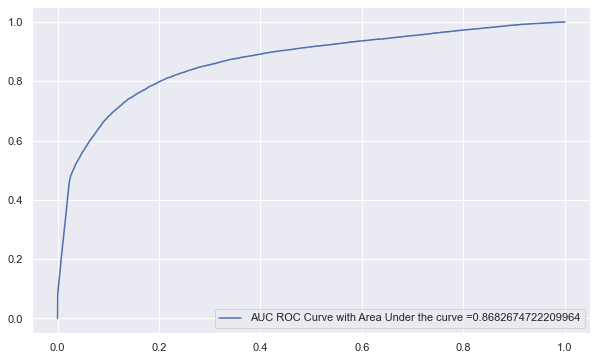

In [18]:
generate_auc_roc_curve(clf2, X_test)

In [19]:
from joblib import dump, load
dump(clf2, 'extra1.joblib')

['extra1.joblib']

In [20]:
test =  pd.read_csv('test_mSzZ8RL.csv')

In [21]:
test['Credit_Product']=test['Credit_Product'].astype(str)
df=test.copy()
lab=LabelEncoder()
df["Gender"]=lab.fit_transform(test["Gender"])
df["Occupation"]=lab.fit_transform(test["Occupation"])
df["Credit_Product"]=lab.fit_transform(test["Credit_Product"])
df["Is_Active"]=lab.fit_transform(test["Is_Active"])
df["Channel_Code"]=lab.fit_transform(test["Channel_Code"])
df["ID"]=lab.fit_transform(test["ID"])
df["Age"]=lab.fit_transform(test["Age"])
df["Region_Code"]=lab.fit_transform(test["Region_Code"])
df["Vintage"]=lab.fit_transform(test["Vintage"])
df["Avg_Account_Balance"]=lab.fit_transform(test["Avg_Account_Balance"])
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,94233,1,5,4,1,0,9,1,27635,0
1,28747,1,19,18,1,1,21,2,37999,0
2,94883,1,7,20,2,0,4,0,732,0
3,90941,1,5,22,1,0,14,0,34903,0
4,87803,0,5,20,1,0,6,0,22312,0


In [22]:
input1=df[0:]
input1

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,94233,1,5,4,1,0,9,1,27635,0
1,28747,1,19,18,1,1,21,2,37999,0
2,94883,1,7,20,2,0,4,0,732,0
3,90941,1,5,22,1,0,14,0,34903,0
4,87803,0,5,20,1,0,6,0,22312,0
...,...,...,...,...,...,...,...,...,...,...
105307,33196,1,28,18,2,1,40,1,77048,1
105308,31821,1,31,27,1,1,40,1,48831,0
105309,52132,1,11,4,2,3,5,0,63962,0
105310,1477,1,29,4,1,2,44,0,27329,1


In [23]:
pre=load("extra1.joblib")
predicted=pre.predict(input1)
ff=pd.DataFrame({"ID":input1["ID"],
                 "Is_Lead"
                 :predicted})
ff.to_csv ('dataframe.csv', index = None, header=True) 

In [24]:
minority_class_len = len(data[data[target] == 1])
print(minority_class_len)

majority_class_indices = data[data[target] == 0].index
print(majority_class_indices)

58288
Int64Index([     0,      1,      2,      3,      4,      5,      7,      8,
                 9,     10,
            ...
            245715, 245716, 245717, 245718, 245719, 245720, 245721, 245722,
            245723, 245724],
           dtype='int64', length=187437)


In [25]:
random_majority_indices = np.random.choice(majority_class_indices,
                                           minority_class_len, 
                                           replace=False)
print(len(random_majority_indices))
minority_class_indices = data[data[target] == 1].index
print(minority_class_indices)

58288
Int64Index([     6,     15,     16,     17,     20,     29,     31,     34,
                36,     37,
            ...
            245683, 245684, 245690, 245693, 245694, 245697, 245699, 245709,
            245713, 245714],
           dtype='int64', length=58288)


<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

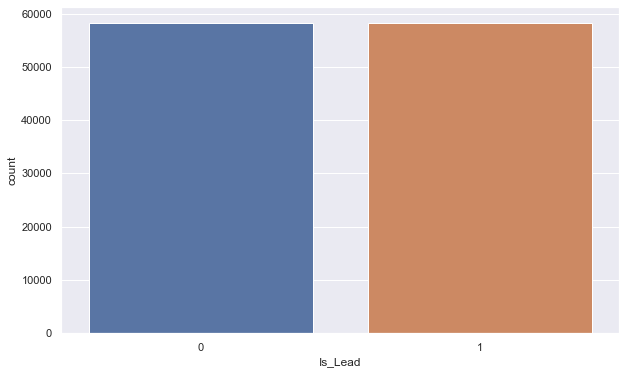

In [26]:
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])
under_sample = data.loc[under_sample_indices]
sns.countplot(x=target, data=under_sample)

In [27]:
X = under_sample.loc[:, data.columns!=target]
Y = under_sample.loc[:, data.columns==target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [28]:
test=pd.read_csv("test_mSzZ8RL.csv")

In [29]:
test['Credit_Product']=test['Credit_Product'].astype(str)
df=test.copy()
lab=LabelEncoder()
df["Gender"]=lab.fit_transform(test["Gender"])
df["Occupation"]=lab.fit_transform(test["Occupation"])
df["Credit_Product"]=lab.fit_transform(test["Credit_Product"])
df["Is_Active"]=lab.fit_transform(test["Is_Active"])
df["Channel_Code"]=lab.fit_transform(test["Channel_Code"])
df["ID"]=lab.fit_transform(test["ID"])
df["Age"]=lab.fit_transform(test["Age"])
df["Region_Code"]=lab.fit_transform(test["Region_Code"])
df["Vintage"]=lab.fit_transform(test["Vintage"])
df["Avg_Account_Balance"]=lab.fit_transform(test["Avg_Account_Balance"])
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,94233,1,5,4,1,0,9,1,27635,0
1,28747,1,19,18,1,1,21,2,37999,0
2,94883,1,7,20,2,0,4,0,732,0
3,90941,1,5,22,1,0,14,0,34903,0
4,87803,0,5,20,1,0,6,0,22312,0


In [30]:
input1=df.iloc[:,0:]
input1

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,94233,1,5,4,1,0,9,1,27635,0
1,28747,1,19,18,1,1,21,2,37999,0
2,94883,1,7,20,2,0,4,0,732,0
3,90941,1,5,22,1,0,14,0,34903,0
4,87803,0,5,20,1,0,6,0,22312,0
...,...,...,...,...,...,...,...,...,...,...
105307,33196,1,28,18,2,1,40,1,77048,1
105308,31821,1,31,27,1,1,40,1,48831,0
105309,52132,1,11,4,2,3,5,0,63962,0
105310,1477,1,29,4,1,2,44,0,27329,1


# THIS TIME I USED Gradientboostingclassifier

In [31]:
X = under_sample.loc[:, data.columns!=target]
Y = under_sample.loc[:, data.columns==target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = GradientBoostingClassifier().fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)

# Use SMOTE

In [32]:
import imblearn
from imblearn.over_sampling import SMOTE
smt=SMOTE()
X_train,Y_train=smt.fit_resample(X_train,Y_train)

In [33]:
Y_train['Is_Lead'].value_counts()

1    39153
0    39153
Name: Is_Lead, dtype: int64

In [34]:
clf = GradientBoostingClassifier().fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)


In [35]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.8064516129032258
Precision =  0.8262897914379802
Recall =  0.7785995035167563
F1 Score =  0.8017360741293001


# Roc curve was 0.88

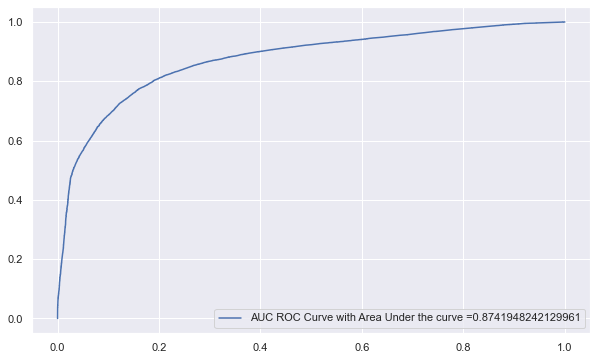

In [36]:
generate_auc_roc_curve(clf, X_test)

In [37]:
from joblib import dump, load
dump(clf, 'extra7.joblib') 

['extra7.joblib']

In [38]:
pre=load("extra7.joblib")
predicted=pre.predict(input1)
ff=pd.DataFrame({"ID":test["ID"],
                 "Is_Lead"
                 :predicted})

ff.to_csv("extra77.csv")